*Created by Petteri Nevavuori <<petteri.nevavuori@gmail.com>>.*

---

# III. Building a General Purpose Cryptocurrency

In this notebook we will go through building a general purpose Smart Contract. We will reuse parts of code from the previous notebooks and develop those ideas further. We'll cover some intuitive concepts where necessary before moving on to building the implementation.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction-to-the-Concept-of-Smart-Contracts" data-toc-modified-id="1.-Introduction-to-the-Concept-of-Smart-Contracts-1">1. Introduction to the Concept of Smart Contracts</a></span><ul class="toc-item"><li><span><a href="#1.1-Smart-Contracts" data-toc-modified-id="1.1-Smart-Contracts-1.1">1.1 Smart Contracts</a></span></li><li><span><a href="#1.2-Decentralized-Applications" data-toc-modified-id="1.2-Decentralized-Applications-1.2">1.2 Decentralized Applications</a></span></li><li><span><a href="#1.3-Ethereum-Virtual-Machine-and-Gas" data-toc-modified-id="1.3-Ethereum-Virtual-Machine-and-Gas-1.3">1.3 Ethereum Virtual Machine and Gas</a></span></li><li><span><a href="#1.4-Decentralized-Autonomous-Organizations" data-toc-modified-id="1.4-Decentralized-Autonomous-Organizations-1.4">1.4 Decentralized Autonomous Organizations</a></span></li></ul></li><li><span><a href="#2.-Building-the-Smart-Contract" data-toc-modified-id="2.-Building-the-Smart-Contract-2">2. Building the Smart Contract</a></span></li><li><span><a href="#3.-Testing-the-Smart-Contract" data-toc-modified-id="3.-Testing-the-Smart-Contract-3">3. Testing the Smart Contract</a></span><ul class="toc-item"><li><span><a href="#3.1-Starting-the-Test-Network" data-toc-modified-id="3.1-Starting-the-Test-Network-3.1">3.1 Starting the Test Network</a></span></li><li><span><a href="#3.2-Initializing-the-Wallet" data-toc-modified-id="3.2-Initializing-the-Wallet-3.2">3.2 Initializing the Wallet</a></span></li><li><span><a href="#3.3-Deploying-the-Smart-Contract" data-toc-modified-id="3.3-Deploying-the-Smart-Contract-3.3">3.3 Deploying the Smart Contract</a></span></li><li><span><a href="#3.4-Interacting-with-the-Smart-Contract" data-toc-modified-id="3.4-Interacting-with-the-Smart-Contract-3.4">3.4 Interacting with the Smart Contract</a></span><ul class="toc-item"><li><span><a href="#Buying-GeneralTokens" data-toc-modified-id="Buying-GeneralTokens-3.4.1">Buying GeneralTokens</a></span></li><li><span><a href="#Selling-GeneralTokens" data-toc-modified-id="Selling-GeneralTokens-3.4.2">Selling GeneralTokens</a></span></li></ul></li></ul></li></ul></div>

## 1. Introduction to the Concept of Smart Contracts

Smart Contracts were kicked off with the conception of Ethereum. The reason for the conception was to allow the developers to build blockhain-based and blockchain-hosted decentralized applications. Ethereum is thus a lot more than just a cryptocurrency such as the Bitcoin - it is essentially a platform. In short, Ethereum focuses on running the programming code of an application and good rundown on the history and the overview of the key concepts can be read about from the article [What is Ethereum](https://coincentral.com/what-is-ethereum/).

### 1.1 Smart Contracts

While Ethereum uses the concept of blockchain, the blocks can hold Smart Contracts i.e. programs in conjuction with transaction data. Smart Contracts are actually programs or protocols of rule-based actions run on the blockchain and its nodes. This is to decentralize the execution of programs from a single server node to a network of distributed nodes of users' computers within the Ethereum network. 

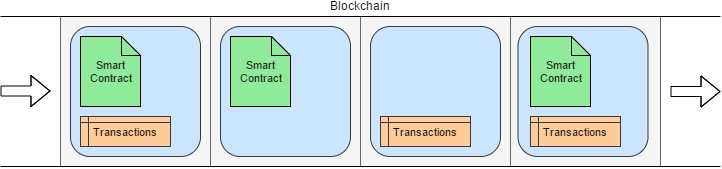

The Smart Contracts are thus solidifed and transparent with their protocols when they are made part of the distributed blockchain. Each node in the network has thus the histories of all smart contracts, transactions and the current states of every smart contract. This is all contained in the blockchain distributed and maintained across the network of nodes.

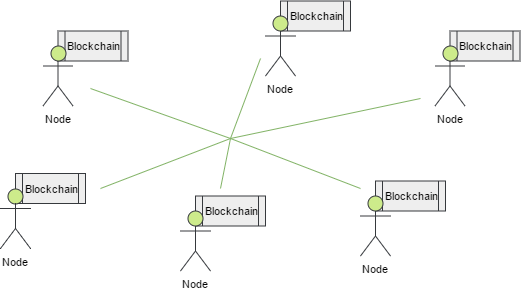

### 1.2 Decentralized Applications

Decentralized Applications or DApps are applications that provide an interface to the blockchain. The DApps provide e.g. a web-based interface, that uses the network of nodes to perform the actions defined by the Smart Contracts across every node in the network. 

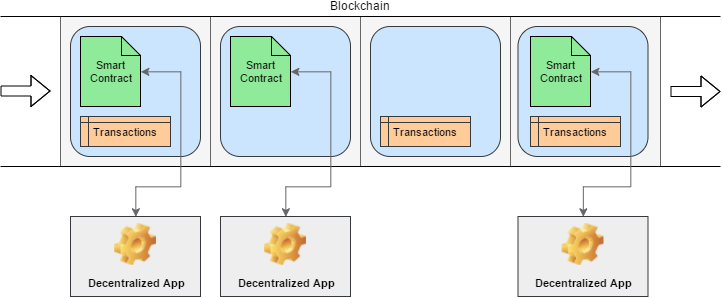

The actions to perform are defined by the Smart Contract that the DApp is interfacing. Thus the Smart Contract forms the backend of the DApp, while the DApp itself provides the clientside frontend. This is how the execution of the applications gets distributed.

### 1.3 Ethereum Virtual Machine and Gas

Let's imagine for a minute that you have a computer acting as a node part of the Ethereum network. You get the blockchain and a DApp requests for running a piece of code within a Smart Contract. This certain piece of code has malicious code, that attempts to inflict harm on your computer running the node - you wouldn't want to run this code. This is why the Smart Contracts are executed in what is called Ethereum Virtual Machines or EVMs to isolate the Smart Contract codes from the node's, i.e. the user's, system.

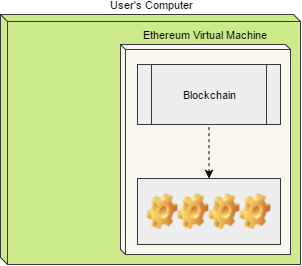

Isolating the Smart Contract execution solves the problem of malicious code, such as viruses. Infinite or massive loops that would break or hinder the whole chain are however a different problem. This is where the concept of Gas helps out by making the developer of the DApp pay for any calculation performed by the Smart Contract (similar to gasoline, cars and mileage). 

Every operation, like summation, multiplication as well as IO and transaction related stuff costs a fixed amount of Gas. There is also a block-wise Gas limit. This drives the developers to perform more intensive operations off-chain, having only the crucials be part of the chain - the writing of good code is thus enforced.

### 1.4 Decentralized Autonomous Organizations

Much like hierarchical organizations function with varying sets of instructions i.e. bureucracy, singular Smart Contracts can also be connected and organized to build up Decentralized Autonomous Organizations or DAOs. The DAOs enable the developers to build DApps utulizing multiple Smart Contracts. 

A prime example provided in the course is an autonomous vehicle, which itself is a combination of a multitude of autonomous systems. A single system can be thought of as a Smart Contract. The vehicle is effectively a hierarchy of Smart Contracts with an organization-distinct bureucracy for handling varying tasks of various levels. Or, as defined by Vitalik Buterin in his [blog post](https://blog.ethereum.org/2014/05/06/daos-dacs-das-and-more-an-incomplete-terminology-guide/):

> The ideal of a decentralized autonomous organization is easy to describe: it is an entity that lives on the internet and exists autonomously, but also heavily relies on hiring individuals to perform certain tasks that the automaton itself cannot do.

## 2. Building the Smart Contract

The next step is then to build the GeneralToken initial coin offering or [ICO](https://hackernoon.com/what-the-heck-is-an-ico-6f3736d5f5a), which is our implementation of a general purpose Smart Contract. The implemented Smart Contract handles GeneralCoin token investements by keeping track of the total and investor-wise quotas. This is however an extremely simple Smart Contract and examples of other more complex implementations can be found in [the documentation's examples](https://solidity.readthedocs.io/en/v0.4.24/solidity-by-example.html).

Note however that there is a difference between coins and tokens. The Smart Contract developed here issues GeneralTokens, which are essentially equivalent to any dApp tokens. These are not to be mixed with coins, as the currency used as the transaction medium in e.g. mining, paying the transaction fees and receiving mining is Ether as dictated by the Ethereum platform.

The building of the general purpose Smart Contract cannot be done in Python however. A [discussion into the topic](https://ethereum.stackexchange.com/questions/10087/are-there-any-implementations-of-smart-contracts-in-python) underlines the fact that EVM-executable code has to written in syntax that the EVM can compile and understand. This is why we will use [Remix](https://remix.ethereum.org/), which is an [Ethereum Solidity](https://solidity.readthedocs.io/) language IDE, to code our ICO. We will however copy and paste both the code and output here with appropriate descriptions.

The syntax of a simple Purhcasing contract written in solidity resembles C++ (or even Java) quite a lot. Here's our simple GeneralCoin ICO contract copied and pasted from the Remix browser IDE:

```C#
// GeneralToken ICO

// Specify desired version of the compiler
// https://solidity.readthedocs.io/en/v0.4.24/layout-of-source-files.html#version-pragma
pragma solidity ^0.4;

contract GeneralTokenICO {
    
    // Define public state variables
    // https://solidity.readthedocs.io/en/v0.4.24/structure-of-a-contract.html#state-variables
    uint public tokenCap = 1000000;
    uint public tokensBought = 0;
    uint public moneyToTokenRate = 1000;

    // Map the investor addresses to GeneralToken equity
    // https://solidity.readthedocs.io/en/v0.4.24/types.html#mappings
    mapping(address => uint) investorEquityGeneralToken;
    
    // Define equity retrieval functions as constants
    // https://solidity.readthedocs.io/en/v0.4.24/structure-of-a-contract.html#functions
    // https://solidity.readthedocs.io/en/v0.4.24/contracts.html#constant-state-variables
    function equityInGT(address investor) external constant returns(uint) {
        return investorEquityGeneralToken[investor];
    }
    
    // Check if investor is eligible to buy GT
    // https://solidity.readthedocs.io/en/v0.4.24/structure-of-a-contract.html#function-modifiers
    modifier tokensLeftToBuy(uint moneyInvested) {
        require(moneyInvested * moneyToTokenRate + tokensBought <= tokenCap);
        _;
    }
    
    // Define GT buying function
    function buyGeneralToken(address investor, uint moneyInvested) external 
    tokensLeftToBuy(moneyInvested) {
        uint investorTokensBought = moneyInvested * moneyToTokenRate;
        investorEquityGeneralToken[investor] += investorTokensBought;
        tokensBought += investorTokensBought;
    }
    
    // Define GT selling function
    function sellGeneralToken(address investor, uint tokensSold) external {
        investorEquityGeneralToken[investor] -= tokensSold;
        tokensBought -= tokensSold;
    }

}
```

## 3. Testing the Smart Contract

After building the Smart Contract it is time to test it. To achieve this, we first initialize a test network and a test chain in which we will inject our Smart Contract to. We must then create a Wallet for utilizing the created Smart Contract.

### 3.1 Starting the Test Network

The initialization and overall operation of our test net is performed via [Ganache](http://truffleframework.com/ganache/), which is a software for simulating Ethereum blockchains offline for building, testing and validating them. Download an OS-corresponding version of the software and start it. Ganache effectively employs the decentralized and distributed blockchain we already implemented in the previous notebook but instead of connecting to ``localhost`` ports around ``5000`` we will use the address indicated by the ``RPC SERVER`` on the top bar.

The basic overview contains multiple account addresses to which we can connect. We will make use of these addresses to test our network. There are also tabs for mined blocks, issued transactions and system logs for inspecting the Smart Contracts and dApps in action.



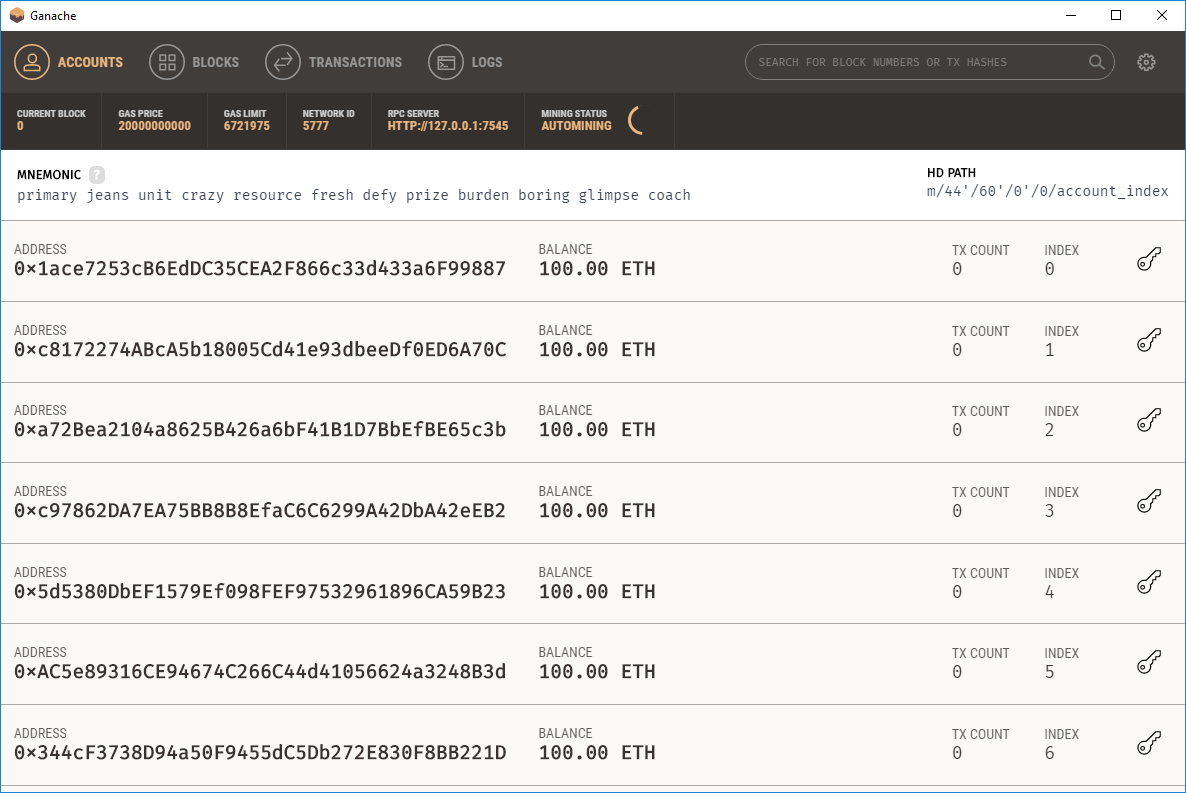

### 3.2 Initializing the Wallet

We will create a test Wallet by downloading an offline copy of the [MyEtherWallet](https://github.com/kvhnuke/etherwallet) and creating a test Wallet just for this test-out. The creation of a personal Wallet isn't however required as we will use the Contracts interaction feature only to test out our Smart Contract and use the keys of Ganache-provided accounts. 

The steps to connet the Wallet to the Ganache blockchain are as follows:

1. Download the latest offline [etherwallet](https://github.com/kvhnuke/etherwallet/releases/) and extract it to a desired location.
2. Open the wallet by navigating to the folder and opening the ``index.html``.
3. Create a new Wallet by selecting ``Add Custom Network/Node`` from the right-most drop down menu on the top bar. Enter any name for the node, but pay attention to the URL. It must be the same given by Ganache as the ``RPC SERVER``, for both the URL and the port. No other changes are required.
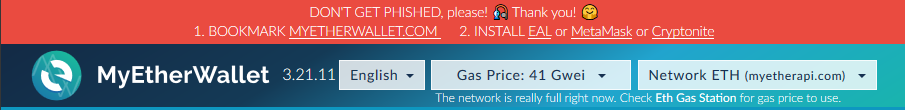

### 3.3 Deploying the Smart Contract

The next step is then to deploy our GeneralToken ICO Smart Contract to the Ethereum blockchain running in Ganache. The steps to follow are:

1. Open Remix and the project and select *Details* from right side within the *Compiler* tab. Copy only the value of the bytecode's object-key *without quotes*.
2. Go to the offline MyEtherWallet, open the *Contracts*-tab and select *Deploy Contract* from the page title.
3. Select *Private Key* for the method of accessing the Wallet, choose a Ganache account to use and open, copy and paste its private key from under the key icon. 
4. Click *Unlock* and sign the transaction and finally deploy the Smart Contract.
5. Locate the transaction in Ganache under the *Transactions* tab:
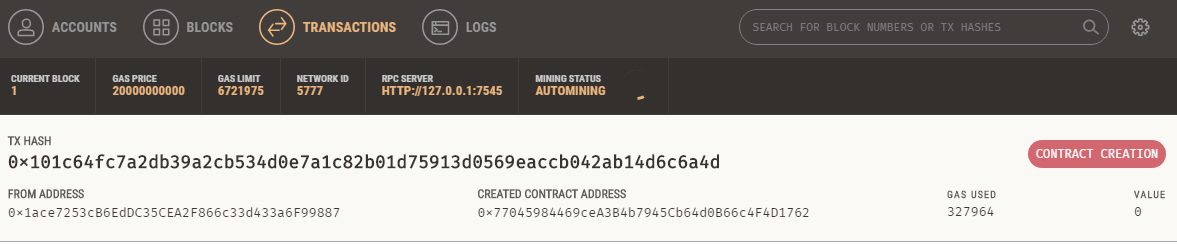

In addition to the transaction being there, there are also other changes. Let's first check the account - it has been charged for the mining fee:

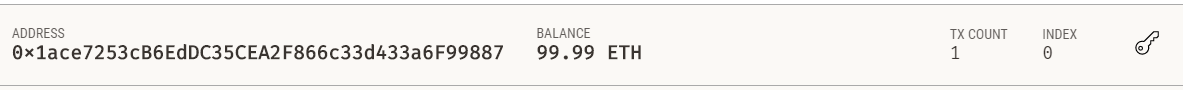

There are also now two blocks in the chain, the initial and the Smart Contract containing one:

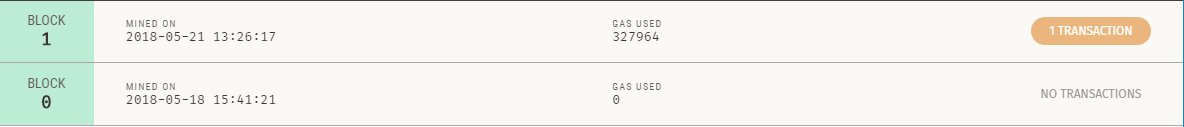

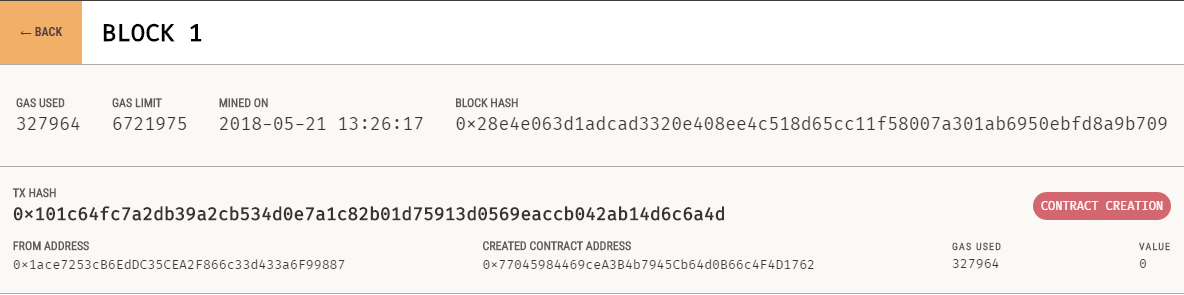

### 3.4 Interacting with the Smart Contract

Now that the Smart Contract is part of the blockchain, it can be used as the backend for our GeneralToken ICO. Let's perform some tests with MyEtherWaller interaction feature found in the *Contracts* tab. So go to that tab and 

1. Select *Interact with Contract*.
2. Copy and paste the created contract address found in the Block details to the *Contract Address* field.
3. Open Smart Contract's Remix project, select *Details* again and copy the contents of *ABI* just below the bytecode to the corresponding field in MyEtherWallet. The ABI is a set of intructions for the Waller regarding the Smart Contract.
4. Access the Contract and select the function 

These functions are the same we defined in the GeneralTokenICO source code. If you select ``tokenCap`` as the function to read, you'll be able to verify the GeneralToken cap to at ``1000000`` tokens. With ``moneyToTokenRate`` you can see that you'll get a thousand tokens for a unit of money. Let's buy some tokens then by selecting ``buyGeneralToken``. Pick a Ganache account to use, paste its address to as the investor's address and the preferred amount of money to invest. 

#### Buying GeneralTokens


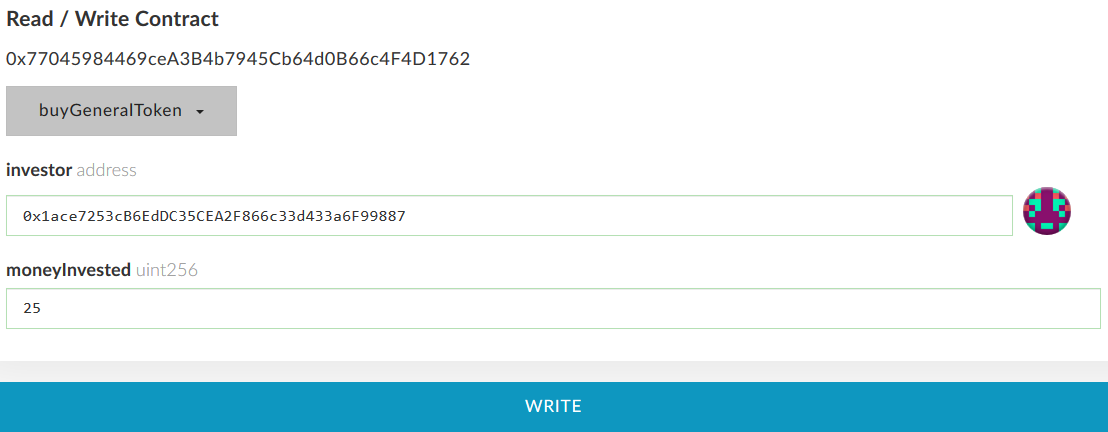

If you try to input an investment value greater than ``1000`` you will not be able to perform the transaction. This enforced by the *function modifier* in the source code, which checks that the investment doesn't topple the token cap or the existing quota.

After writing this transaction the blockchain has grown by a block with the new transaction in the newest block. Let's however perform a check to the investor equity instead of encrypted Ganache data:

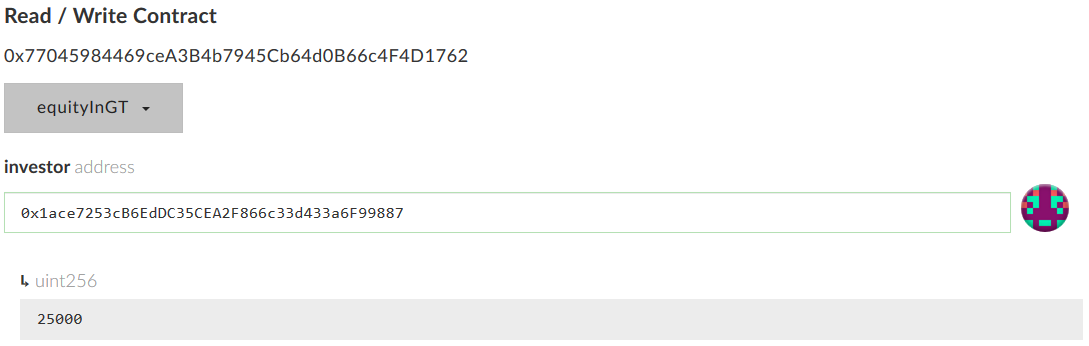

#### Selling GeneralTokens

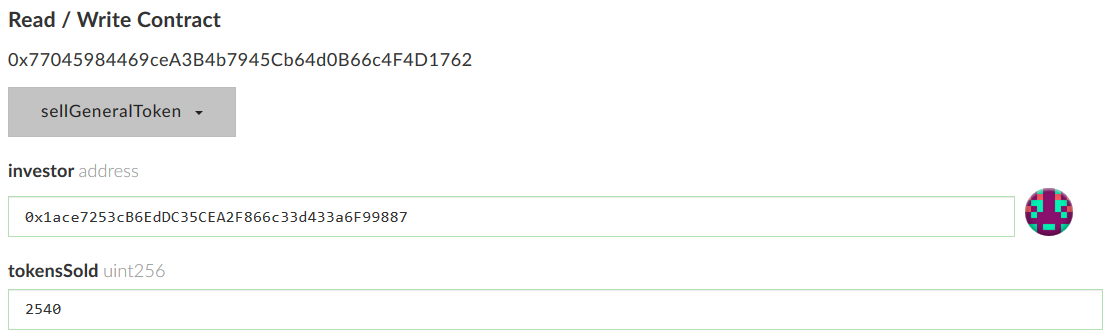

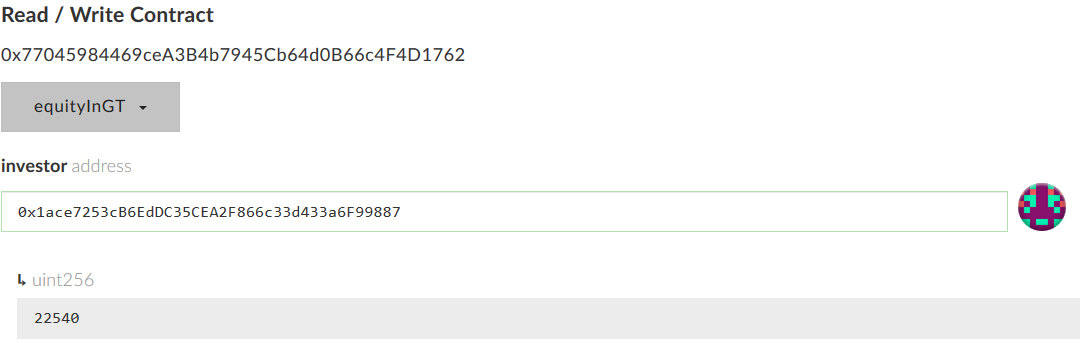

We have succesfully used the Smart Contract as a backend. The next step would then be to develop a frontend, such as a UI for managing the GeneralToken ICO in the form of a website. The backend ensures the decentralization of the application. But this is out of the scope of this topic.